In [1]:
from PIL.Image import *
from math import *

In [2]:
def filtre(img, c):
    (largeur, hauteur) = img.size
    for i in range(largeur):
        for j in range(hauteur):
            (r,g,b) = img.getpixel((i,j))
            if c == "r":
                img.putpixel((i,j), (r,0,0))
            elif c == "g":
                img.putpixel((i,j), (0,g,0))
            else:
                img.putpixel((i,j), (0,0,b))

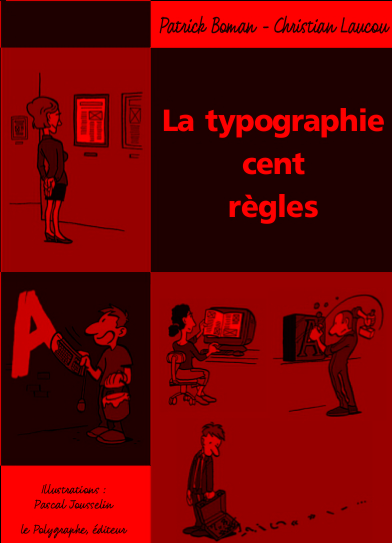

In [3]:
img = open("images/livre.jpg")
filtre(img, "r")
display(img)

In [4]:
def distanceManhattan(x1, y1, x2, y2):
    return abs(x2 - x1) + abs(y2 - y1)

def distance(x1, y1, x2, y2):
    return sqrt((x2-x1)**2 + (y2-y1)**2)

In [5]:
def dessinerCercleV1(img, xc, yc, r, c):
    largeur, hauteur = img.size
    epsilon = 1
    for i in range(largeur):
        for j in range(hauteur):
            d = distance(xc, yc, i, j)
            if d <= r + epsilon and d >= r - epsilon:
                img.putpixel((i,j), c)

In [6]:
def dessinerCercleV1Man(img, xc, yc, r, c):
    largeur, hauteur = img.size
    for i in range(largeur):
        for j in range(hauteur):
            d = distanceManhattan(xc, yc, i, j)
            if d == r:
                img.putpixel((i,j), c)

In [7]:
def dessinerCercleV2(img, xc, yc, r, c):
    alpha = 0
    while alpha < 2*pi:
        x = xc + r*cos(alpha)
        y = yc + r*sin(alpha)
        img.putpixel((int(x), int(y)), c)
        alpha += 1e-3

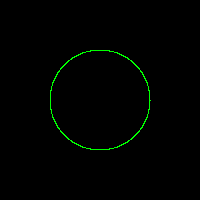

In [8]:
img = new("RGB", (200, 200))
dessinerCercleV2(img, 100, 100, 50, (0,255,0))
display(img)

La tansformation du photomaton utilise les transformations suivantes:

* si $x\%2 == 0$ and $y\%2 == 0 \Rightarrow (x', y') = (x\ //\ 2, y\ //\ 2)$ 
* si $x\%2 == 0$ and $y\%2 == 1 \Rightarrow (x', y') = (x\ //\ 2, y\ //\ 2 + size\ //\ 2)$
* si $x\%2 == 1$ and $y\%2 == 0 \Rightarrow (x', y') = (x\ //\ 2 + size\ //\ 2, y\ //\ 2)$
* si $x\%2 == 1$ and $y\%2 == 1 \Rightarrow (x', y') = (x\ //\ 2 + size\ //\ 2, y\ //\ 2 + size\ //\ 2)$

In [9]:
def translation(position, size):
    if position % 2 == 0:
        return position // 2
    else:
        return position // 2 + size // 2

def photomaton(img):
    largeur, hauteur = img.size
    photo = new("RGB", img.size)
    for i in range(largeur):
        for j in range(hauteur):
            photo.putpixel((translation(i, largeur), 
                            translation(j, hauteur)), 
                            img.getpixel((i,j)))
    return photo

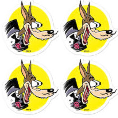

In [10]:
toon = open("images/toon.jpeg")
n = 13
for i in range(1, n+1):
    if i == 1:
        photo = photomaton(toon)
    elif i > 1:
        photo = photomaton(photo)
display(photo)

In [11]:
def forwardRotate(img, angle):
    width, height = img.size
    dest = new("RGB", img.size)
    for i in range(width):
        for j in range(height):
            di = round(i*cos(angle) - j*sin(angle))
            dj = round(i*sin(angle) + j*cos(angle))
            if inside(img, di, dj):
                dest.putpixel((di, dj), img.getpixel((i, j))) 
    return dest

def inside(img, x, y):
    width, height = img.size
    return x >= 0 and x < img.width and y >= 0 and y < img.height 

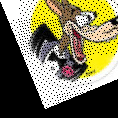

In [12]:
toon = open("images/toon.jpeg")
forwardRotate(toon, -pi/8)

Les points noirs représentent des pixels pour lesquels le calcul de rotation ne renvoie aucune valeur.  

In [13]:
def backwardRotate(img, angle):
    width, height = img.size
    dest = new("RGB", img.size)
    for i in range(width):
        for j in range(height):
            img_i = round( i*cos(angle) + j*sin(angle))
            img_j = round(-i*sin(angle) + j*cos(angle))
            if inside(img, img_i, img_j):
                dest.putpixel((i, j), img.getpixel((img_i, img_j)))
            else:
                dest.putpixel((i,j), (0,0,0))
    return dest

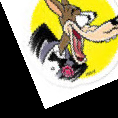

In [14]:
toon = open("images/toon.jpeg")
backwardRotate(toon, -pi/8)

In [15]:
def backwardRotateCenter(img, angle, xc, yc):
    width, height = img.size
    dest = new("RGB", img.size)
    for i in range(width):
        for j in range(height):
            img_i = round(xc + (i - xc) * cos(angle) + (j - yc) * sin(angle))
            img_j = round(yc - (i - xc) * sin(angle) + (j - yc) * cos(angle))
            if inside(img, img_i, img_j):
                dest.putpixel((i, j), img.getpixel((img_i, img_j)))
            else:
                dest.putpixel((i,j), (240,240,240))
    return dest

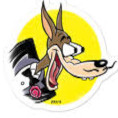

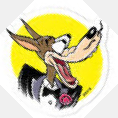

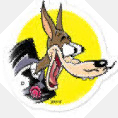

In [16]:
toon = open("images/toon.jpeg")
display(toon)
xc, yc = toon.size[0]//2, toon.size[1]//2
dest = backwardRotateCenter(toon, -pi/4, xc, yc) # on tourne l'image dans le sens trigo de pi/4
display(dest)
dest = backwardRotateCenter(dest, pi/4, xc, yc)  # on tourne l'image dans le sens horaire de pi/4
display(dest)

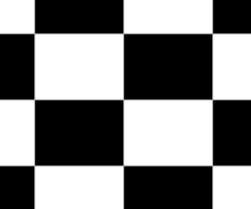

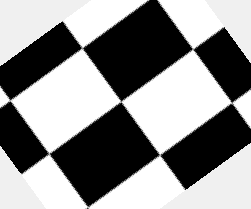

In [17]:
board = open("images/damier.png")
display(board)
xc, yc = board.size[0]//2, board.size[1]//2
dest = backwardRotateCenter(board, -pi/5, xc, yc)
display(dest)

In [18]:
def backwardRotateCenterWithFirstOrderInterpolation(img, angle, xc, yc):
    width, height = img.size
    dest = new("RGB", img.size)
    for i in range(width):
        for j in range(height):
            img_i = xc + (i - xc) * cos(angle) + (j - yc) * sin(angle)
            img_j = yc - (i - xc) * sin(angle) + (j - yc) * cos(angle)
            if inside(img, img_i, img_j):
                colorPixel = bilinearInterpolation(img, img_i, img_j)
                dest.putpixel((i, j), colorPixel)
            else:
                dest.putpixel((i,j), (240,240,240))
    return dest

def bilinearInterpolation(img, x, y):
    xo, yo = floor(x), floor(y)
    delta_x = x - xo
    delta_y = y - yo
    colorPixel = (240,240,240)
    if xo < img.size[0]-1 and yo < img.size[1]-1:
        r0, g0, b0, alpha = img.getpixel((xo, yo))
        r1, g1, b1, alpha = img.getpixel((xo + 1, yo))
        r2, g2, b2, alpha = img.getpixel((xo, yo + 1))
        r3, g3, b3, alpha = img.getpixel((xo + 1, yo + 1))
        p = (r0 + (r1 - r0) * delta_x, g0 + (g1 - g0) * delta_x, b0 + (b1 - b0) * delta_x) 
        q = (r2 + (r3 - r2) * delta_x, g2 + (g3 - g2) * delta_x, b2 + (b3 - b2) * delta_x) 
        colorPixel = (int(p[0] + (q[0] - p[0]) * delta_y), int(p[1] + (q[1] - p[1]) * delta_y), int(p[2] + (q[2] - p[2]) * delta_y))
    return colorPixel

Interpolation bilinéaire pour lisser les contours après rotation, première image avant lissage deuxième image avec lissage

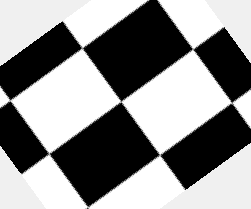

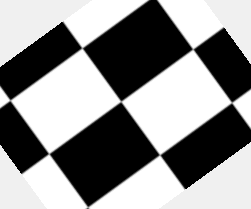

In [19]:
board = open("images/damier.png")
xc, yc = board.size[0]//2, board.size[1]//2
dest1 = backwardRotateCenter(board, -pi/5, xc, yc)
dest2 = backwardRotateCenterWithFirstOrderInterpolation(board, -pi/5, xc, yc)
display(dest1)
display(dest2)